In [197]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load the data

In [311]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [312]:
y.shape, tx.shape

((10000,), (10000, 2))

# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [198]:
def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE
    # ***************************************************
    
    L = mean_absolute_error(y.reshape(-1,1), np.dot(tx,w))
    return L
    #raise NotImplementedError

w = np.array([[3],[12]])
L = compute_loss(y, tx, w)

In [199]:
L

71.06780585492636

# 2 Grid Search

Fill in the function `grid_search()` below:

In [41]:
print(y.reshape(len(y),1).shape)
print((tx.dot(w)).shape)
print((y.reshape(len(y),1)-np.dot(tx,w)).shape)

(10000, 1)
(10000, 1)
(10000, 1)


In [34]:
def grid_search(y, tx, grid_w0, grid_w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(grid_w0), len(grid_w1)))
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss for each combination of w0 and w1.
    # ***************************************************
    for i, w0 in enumerate(grid_w0):
        for k, w1 in enumerate(grid_w1):
            losses[i,k] = compute_loss(y,tx,np.array([[w0],[w1]]))

    return losses

Let us play with the grid search demo now!

Grid Search: loss*=31.11740673721906, w0*=72.72727272727272, w1*=13.636363636363626, execution time=1.858 seconds


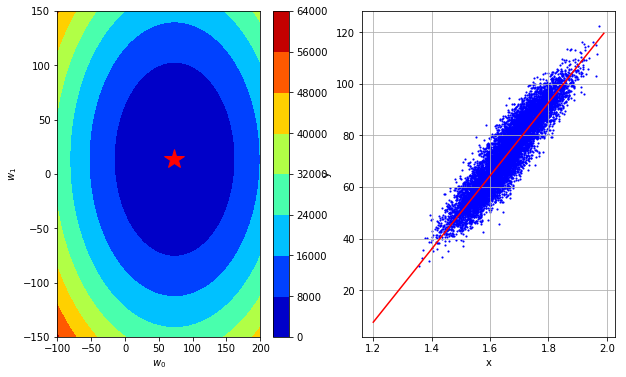

In [78]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=100)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [100]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient and loss
    # ***************************************************
    N = len(y)
    e = y.reshape((-1,1)) - np.dot(tx,w)
    gL = -1/N * np.dot(tx.T, e)
    return gL


In [101]:
A = compute_gradient(y,tx,np.array([[0],[0]]))
A.shape

(2, 1)

Please fill in the functions `gradient_descent` below:

In [351]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        gL = compute_gradient(y, tx, w)
        loss = compute_loss(y, tx, w)
        # raise NotImplementedError
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        w = w - gamma * gL

        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [354]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1

# Initialization
w_initial = np.array([[-100], [100]])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=174.17856202812857, w0=[-82.59321941], w1=[91.10348949]
Gradient Descent(1/49): loss=156.75033258301912, w0=[-66.92711689], w1=[83.09663002]
Gradient Descent(2/49): loss=141.06492608242058, w0=[-52.82762461], w1=[75.89045651]
Gradient Descent(3/49): loss=126.94806023188191, w0=[-40.13808157], w1=[69.40490034]
Gradient Descent(4/49): loss=114.24288096639714, w0=[-28.71749282], w1=[63.5678998]
Gradient Descent(5/49): loss=102.80821962746084, w0=[-18.43896296], w1=[58.3145993]
Gradient Descent(6/49): loss=92.51702442241817, w0=[-9.18828608], w1=[53.58662886]
Gradient Descent(7/49): loss=83.2560919302131, w0=[-0.86267688], w1=[49.33145546]
Gradient Descent(8/49): loss=74.93048273719181, w0=[6.63037139], w1=[45.5017994]
Gradient Descent(9/49): loss=67.43743446347263, w0=[13.37411484], w1=[42.05510895]
Gradient Descent(10/49): loss=60.693691017125374, w0=[19.44348394], w1=[38.95308754]
Gradient Descent(11/49): loss=54.62432191541283, w0=[24.90591613], w1=[36.1612

In [355]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 4 Stochastic gradient descent

In [114]:
tx.shape

(10000, 2)

In [356]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient computation.It's same as the gradient descent.
    # ***************************************************
    #raise NotImplementedError
    N = len(y)
    e = y.reshape((-1,1)) - np.dot(tx,w)
    sg = -1/N * np.dot(tx.T, e)
    return sg

def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient descent.
    # ***************************************************
    #raise NotImplementedError
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        
        for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size):
            sg = compute_gradient(minibatch_y.reshape(-1,1), minibatch_tx, w)
            loss = compute_loss(minibatch_y, minibatch_tx, w)
            
        # raise NotImplementedError
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        w = w - gamma * sg

        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

In [359]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1
batch_size = 1

# Initialization
w_initial = np.array([[0], [0]])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=80.41209896933115, w0=[8.0412099], w1=[5.69347827]
Gradient Descent(1/49): loss=55.58781632002407, w0=[13.59999153], w1=[3.7556328]
Gradient Descent(2/49): loss=72.09246457081325, w0=[20.80923799], w1=[13.07796195]
Gradient Descent(3/49): loss=43.51590146638594, w0=[25.16082813], w1=[7.88067845]
Gradient Descent(4/49): loss=61.24295345849704, w0=[31.28512348], w1=[15.57321305]
Gradient Descent(5/49): loss=34.73676904928346, w0=[34.75880038], w1=[16.5595431]
Gradient Descent(6/49): loss=43.325996059873226, w0=[39.09139999], w1=[19.98357129]
Gradient Descent(7/49): loss=38.563270960228614, w0=[42.94772709], w1=[20.82586891]
Gradient Descent(8/49): loss=32.441314752778, w0=[46.19185856], w1=[23.8991937]
Gradient Descent(9/49): loss=37.22328495267776, w0=[49.91418706], w1=[22.61775598]
Gradient Descent(10/49): loss=40.13436591894701, w0=[53.92762365], w1=[19.06792203]
Gradient Descent(11/49): loss=21.784034156089774, w0=[56.10602706], w1=[19.67949348]
Gradient 

In [360]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 5 Effect of Outliers and MAE Cost Function, and Subgradient Descent

### Exercise 5

Load and plot data containing outliers

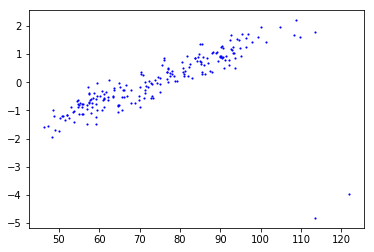

In [344]:
height, weight, gender = load_data(sub_sample=True, add_outlier=True)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

plt.figure(1)
plt.scatter(y,tx[:,1],marker=".", color="b", s=5)

### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)

In [322]:
def compute_sub_gradient(y, tx, w):
    
    g = np.array([[0.],[0.]])
    
    for i in range(len(y)):
        
        q_w_i = y[i] - tx[i,:].dot(w)
        
        if q_w_i > 1e-4:
            g += -tx[i,:].reshape(-1,1)
        elif q_w_i < -1e-4:
            g += tx[i,:].reshape(-1,1)
        elif True:
            print("non-differentiable point reached")
            g += -tx[i,:].reshape(-1,1)/2
            
    return 1 * g
    

In [307]:
g = compute_sub_gradient(y,tx,w)
g

array([[-2.02000000e+02],
       [-1.76303416e-13]])